<a href="https://colab.research.google.com/github/vidjaydas/DS_Assignments/blob/main/Association_Rules_Assignment_Mymovie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data = pd.read_csv('/content/my_movies.csv')
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [6]:
data.shape

(10, 15)

In [7]:
data1 = pd.get_dummies(data)
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


#Apriori Algorithm

In [8]:
frequent_itemsets = apriori(data1, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
1392,0.1,"(Sixth Sense, V5_LOTR2, V1_Sixth Sense, Harry ...",9
1393,0.1,"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",9
1394,0.1,"(Sixth Sense, V5_LOTR2, V1_Sixth Sense, Harry ...",9
1395,0.1,"(LOTR2, V5_LOTR2, V1_Sixth Sense, Harry Potter...",9


In [9]:
freq1 = frequent_itemsets[ (frequent_itemsets['length']==1) & (frequent_itemsets['support']>= 0.02)]
freq1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [10]:
freq1.shape

(25, 3)

In [11]:
freq2 = frequent_itemsets[ (frequent_itemsets['length']==2) & (frequent_itemsets['support']>= 0.02)]
freq2

,support,itemsets,length
25,0.5,"(Sixth Sense, Gladiator)",2
26,0.1,"(Sixth Sense, LOTR1)",2
27,0.1,"(Sixth Sense, Harry Potter1)",2
28,0.4,"(Sixth Sense, Patriot)",2
29,0.1,"(Sixth Sense, LOTR2)",2
...,...,...,...
121,0.4,"(V2_Patriot, V3_Sixth Sense)",2
122,0.1,"(V4_Green Mile, V3_Gladiator)",2
123,0.1,"(V4_Green Mile, V3_Harry Potter1)",2
124,0.1,"(V5_LOTR2, V3_Harry Potter1)",2


In [12]:
freq2.shape

(101, 3)

In [13]:
freq3 = frequent_itemsets[ (frequent_itemsets['length']==3) & (frequent_itemsets['support']>= 0.02)]
freq3.shape

(216, 3)

In [14]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules
#set the confidence level to 70%

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
56755,"(LOTR2, V3_Harry Potter1)","(Sixth Sense, V5_LOTR2, V1_Sixth Sense, Harry ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,"(V2_LOTR1, V3_Harry Potter1)","(Sixth Sense, LOTR2, V5_LOTR2, V1_Sixth Sense,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V5_LOTR2),"(Sixth Sense, LOTR1, V1_Sixth Sense, Harry Pot...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56758,(V2_LOTR1),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [19]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules
#Rule that have a lift score Minimum 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V4_Green Mile),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64213,(LOTR2),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(V2_LOTR1),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [20]:
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(LOTR2, Green Mile, V3_Harry Potter1, Harry Po...","(Sixth Sense, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42182,"(LOTR1, V5_LOTR2, V2_LOTR1, Harry Potter1)","(LOTR2, Green Mile, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42170,"(LOTR2, Green Mile, LOTR1, Harry Potter1)","(V5_LOTR2, V2_LOTR1, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42171,"(LOTR2, Green Mile, V2_LOTR1, Harry Potter1)","(LOTR1, V5_LOTR2, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42172,"(LOTR2, LOTR1, V2_LOTR1, Harry Potter1)","(V5_LOTR2, Green Mile, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
6267,"(Green Mile, V4_Green Mile, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
240,"(Sixth Sense, Gladiator)",(V4_Green Mile),0.5,0.2,0.1,0.2,1.0,0.00,1.0
212,"(Sixth Sense, Gladiator)",(V1_Sixth Sense),0.5,0.2,0.1,0.2,1.0,0.00,1.0
215,(V1_Sixth Sense),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0


In [21]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V4_Green Mile),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64213,(LOTR2),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64214,(V2_LOTR1),"(Sixth Sense, LOTR1, V5_LOTR2, V1_Sixth Sense,...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


#Visualization

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

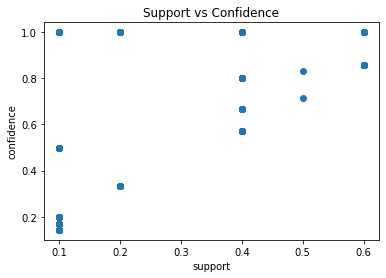

In [34]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

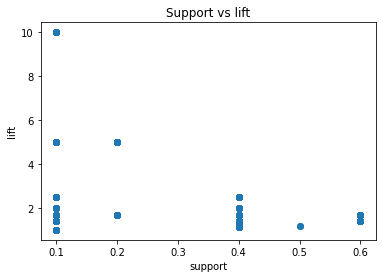

In [35]:
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

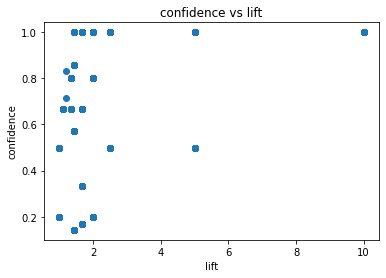

In [39]:
plt.scatter(rules['lift'], rules['confidence'])
plt.ylabel('confidence')
plt.xlabel('lift')
plt.title('confidence vs lift')
plt.show()